![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`
### `Alumnos: Lázaro Sánchez Ricardo Alezander`
### `         Marines Vega Piero Alexander`
### `         Magan Armas Cesar Ailton Joaquin`
```
Laboratorio 2: Filtros media movil / filtro gaussiano
```


###**2.1. Importación de Librerías y señal de audio**




* **Ingreso de audio con ruido**

In [ ]:
!wget -nc /content/sample_data/Grabación.wav
!pip install pysoundfile
!pip install bitstring

/content/sample_data/Grabación.wav: Scheme missing.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 7.5 MB/s eta 0:00:00


* **Mostrando audio ingresado:**

Tasa de muestreo: 48000 muestras/segundo
Tamaño de señal: 160128 muestras
Duración: 3.336 segundos


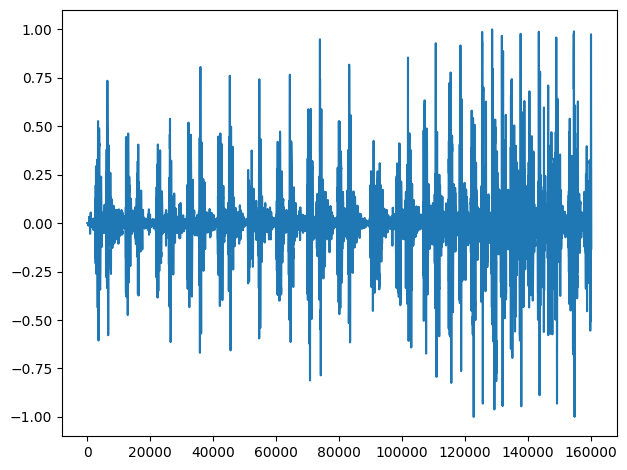

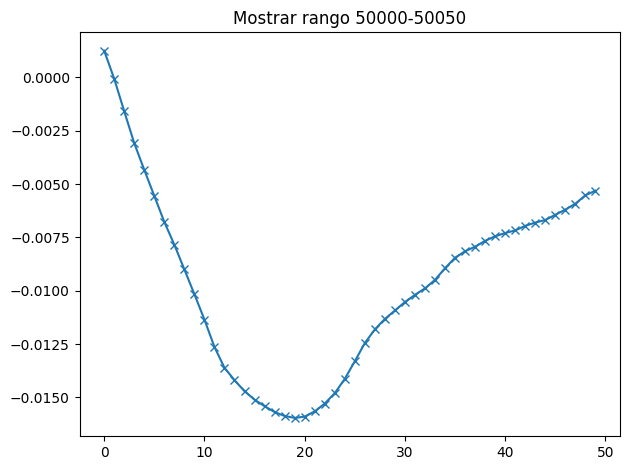

In [ ]:
import IPython
import soundfile
import matplotlib.pyplot as plt

audio_signal, sampling_rate = soundfile.read('/Grabación.wav')
type(audio_signal)

print('Tasa de muestreo: {} muestras/segundo'.format(sampling_rate))
print('Tamaño de señal: {} muestras'.format(audio_signal.shape[0]))
print('Duración: {:.3f} segundos'.format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[50000:50050], marker='x')
plt.title('Mostrar rango 50000-50050')
plt.tight_layout()
IPython.display.Audio('/Grabación.wav')

* **Librerias a utilizar:**

In [ ]:
import numpy as np #manejo de arrays.
import matplotlib.pyplot as plt #visualización de gráficos.
import scipy.fft as fourier
import scipy.io.wavfile as waves
import scipy.signal
from matplotlib import animation, patches, rc
import ipywidgets as widgets
import matplotlib as mpl
from IPython.display import YouTubeVideo, HTML, Audio
plt.style.use(['dark_background']) #para gráficas para temas oscuros.

* **Creación de la señal:**

In [ ]:
fm = sampling_rate
t = np.arange(0, len(audio_signal)) /fm
n = len(t)
amp = audio_signal
sen = amp

* **Mostrando señal generada:**

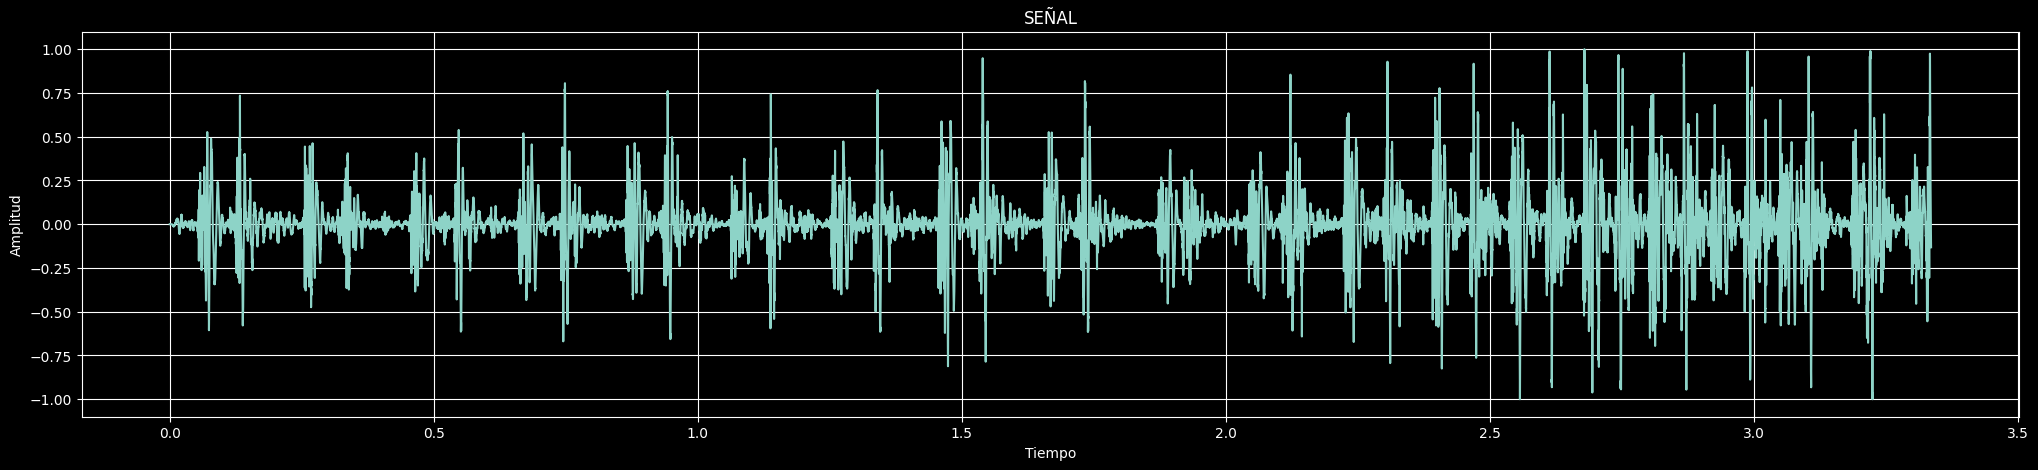

In [ ]:
plt.subplots(1,1, figsize=(25,5))

plt.subplot(111)
plt.plot(t,amp)
plt.title("SEÑAL")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()


### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)



* **Aplicación del filtro media movil:**

In [ ]:
sen_filtrada = np.zeros(n) #inicializamos el vector de salida, con el mismo tamaño que la señal creada.

k = 50 #La ventana u orden del filtro es 2*K+1 = 101.
for i in range(k,n-k-1):
  sen_filtrada[i]=np.mean(sen[i-k:i+k])
tama_ventana = 1000*((k*2)+1) /fm

* **Gráficas de los resutados:**

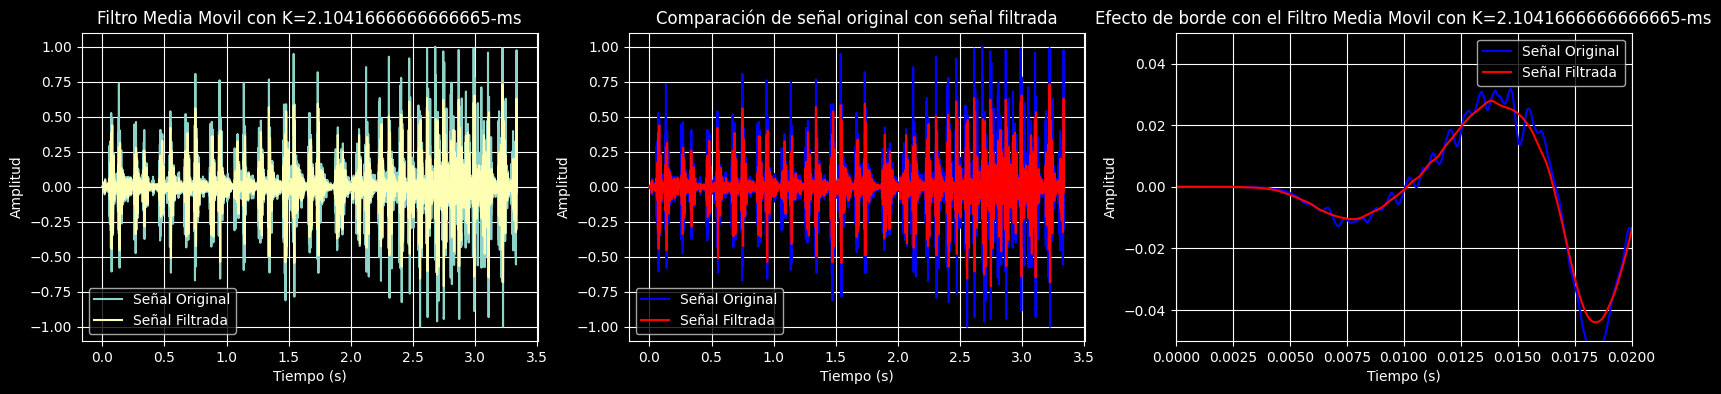

In [ ]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t,sen, label='Señal Original')
plt.plot(t,sen_filtrada, label='Señal Filtrada')
plt.title(f'Filtro Media Movil con K={tama_ventana}-ms')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t,amp,'b',label='Señal Original')
plt.plot(t,sen_filtrada,'r',label='Señal Filtrada')
plt.title(f'Comparación de señal original con señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t,amp,'b',label='Señal Original')
plt.plot(t,sen_filtrada,'r',label='Señal Filtrada')
plt.title(f'Efecto de borde con el Filtro Media Movil con K={tama_ventana}-ms')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([0, 0.02, -0.05, 0.05])
plt.grid()
plt.legend()

plt.show()


* **Audio Filtrado:**

In [ ]:

output_file = 'Grabación1.wav'
soundfile.write(output_file, sen_filtrada, sampling_rate)

# Reproducir el audio filtrado
import IPython.display as ipd
ipd.Audio(output_file)

### **2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)




* **Creación del filtro gaussiano:**

In [ ]:
FWHM=0.5
k=50
gt=1000*np.arange(-k,k)/fm
filtro_gauss=np.exp(-(4*np.log(2)*gt**2)/(FWHM**2))
filtro_gauss_norm=filtro_gauss/np.sum(filtro_gauss)

ind_flanco_down=k+np.argmin((filtro_gauss[k:]-.5)**2)
ind_flanco_up=np.argmin((filtro_gauss-.5)**2)
FWHM_calcu=gt[ind_flanco_up]-gt[ind_flanco_down]

* **Mostrando el filtro gaussiano construido:**

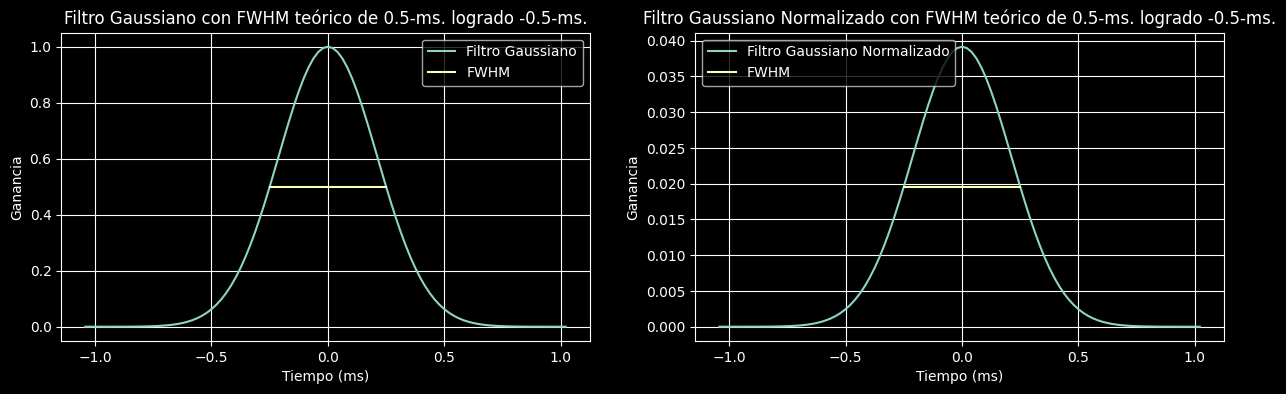

In [ ]:
plt.subplots(1,2,figsize=(15,4))

plt.subplot(121)
plt.plot(gt,filtro_gauss, label='Filtro Gaussiano')
plt.plot([gt[ind_flanco_up],gt[ind_flanco_down]],[filtro_gauss[ind_flanco_up],filtro_gauss[ind_flanco_down]], label='FWHM')
plt.title(f'Filtro Gaussiano con FWHM teórico de {FWHM}-ms. logrado {FWHM_calcu}-ms.')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gt,filtro_gauss_norm, label='Filtro Gaussiano Normalizado')
plt.plot([gt[ind_flanco_up],gt[ind_flanco_down]],[filtro_gauss_norm[ind_flanco_up],filtro_gauss_norm[ind_flanco_down]], label='FWHM')
plt.title(f'Filtro Gaussiano Normalizado con FWHM teórico de {FWHM}-ms. logrado {FWHM_calcu}-ms.')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.show()

* **Aplicación del filtro Gaussiano:**

In [ ]:
sen_filtrada_gauss=np.zeros_like(sen)
#Orden del filtro : 2*k=100
for i in range(k+1,n-k-1):
  sen_filtrada_gauss[i]=np.sum(sen[i-k:i+k]*filtro_gauss_norm)

* **Mostrando los resultados:**

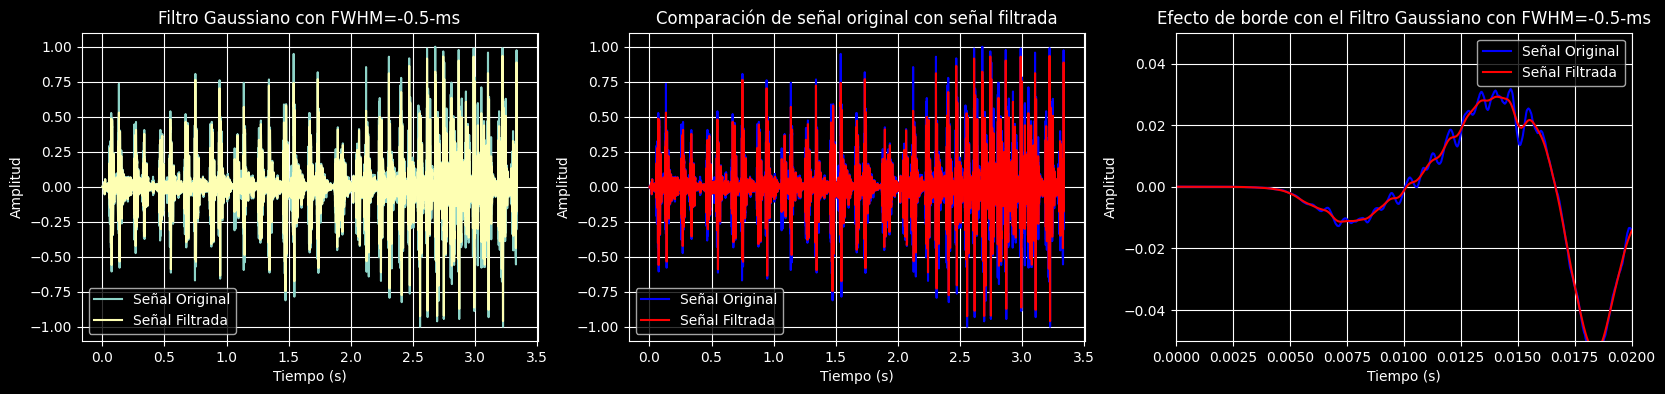

In [ ]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t,sen, label='Señal Original')
plt.plot(t,sen_filtrada_gauss, label='Señal Filtrada')
plt.title(f'Filtro Gaussiano con FWHM={FWHM_calcu}-ms')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t,amp,'b',label='Señal Original')
plt.plot(t,sen_filtrada_gauss,'r',label='Señal Filtrada')
plt.title(f'Comparación de señal original con señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t,amp,'b',label='Señal Original')
plt.plot(t,sen_filtrada_gauss,'r',label='Señal Filtrada')
plt.title(f'Efecto de borde con el Filtro Gaussiano con FWHM={FWHM_calcu}-ms')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([0, 0.02, -0.05, 0.05])
plt.grid()
plt.legend()

plt.show()

* **Audio Filtrado:**

In [ ]:
output_file2 = 'Grabación2.wav'
soundfile.write(output_file2, sen_filtrada_gauss, sampling_rate)

# Reproducir el audio filtrado
import IPython.display as ipd
ipd.Audio(output_file2)

### **2.4. Comparación de los filtros utilizados**

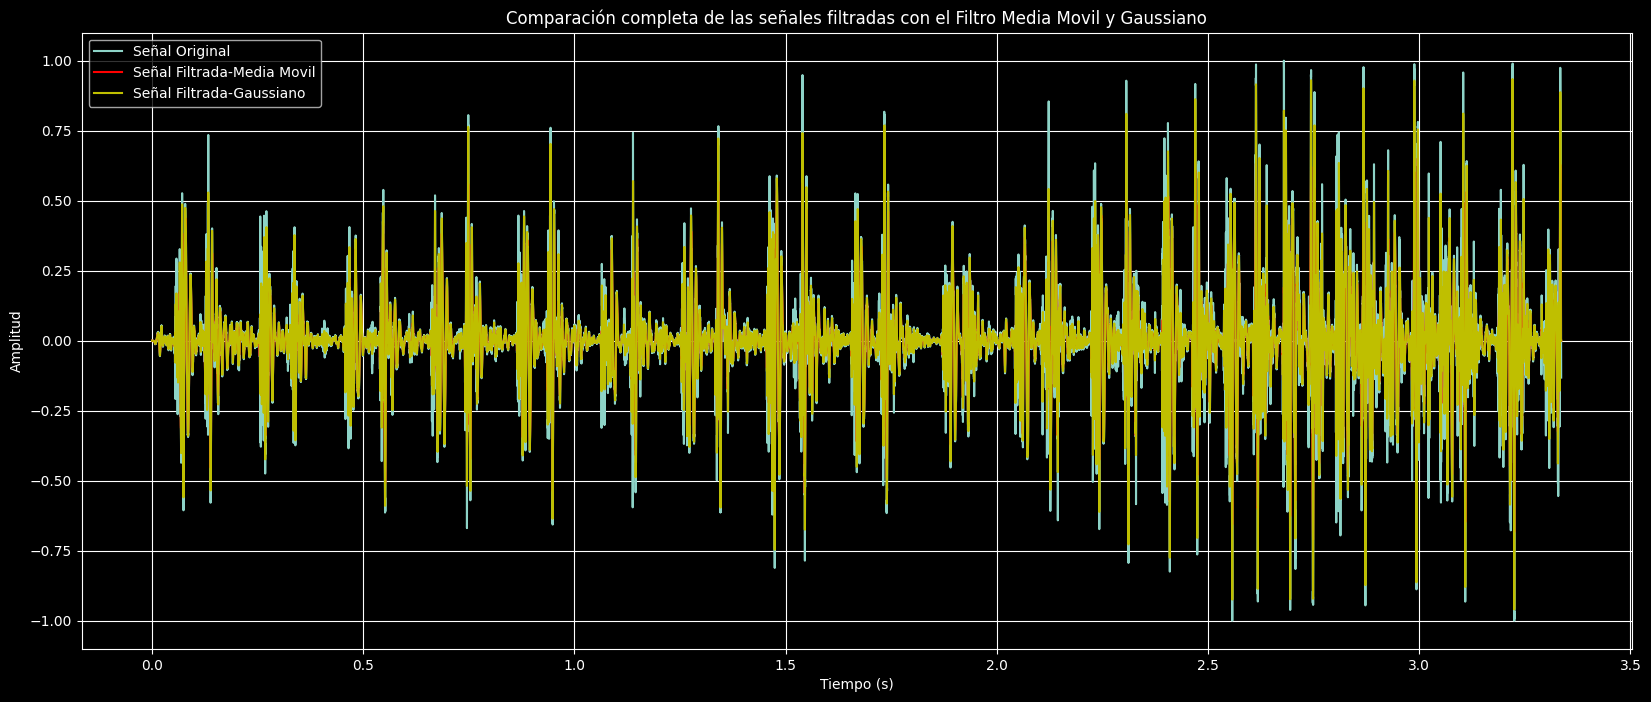

In [ ]:
plt.subplots(figsize=(20,8))

plt.plot(t,amp, label='Señal Original')
plt.plot(t,sen_filtrada, 'r', label='Señal Filtrada-Media Movil')
plt.plot(t,sen_filtrada_gauss, 'y', label='Señal Filtrada-Gaussiano')
plt.title('Comparación completa de las señales filtradas con el Filtro Media Movil y Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.show()

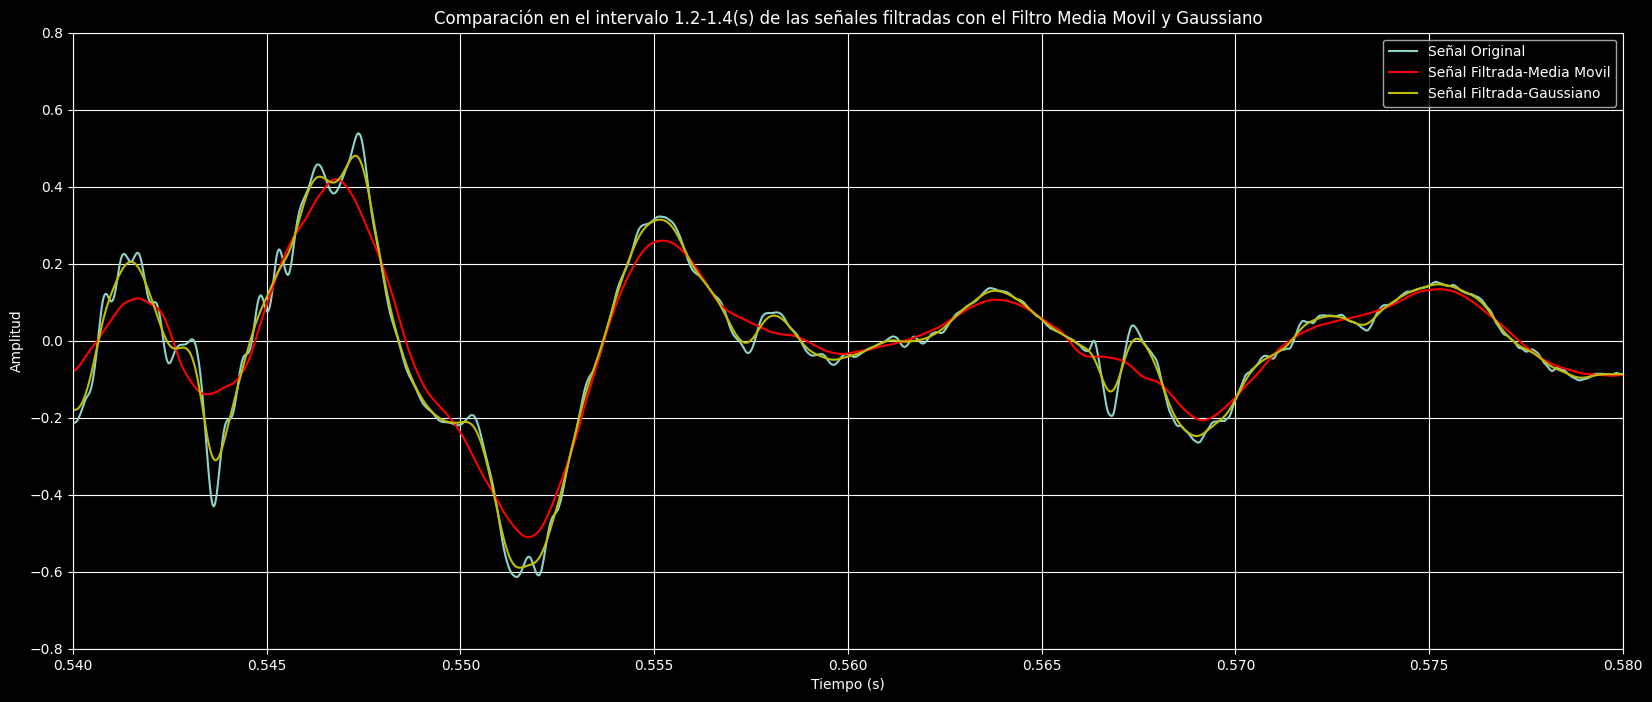

In [ ]:
plt.subplots(figsize=(20,8))

plt.plot(t,amp, label='Señal Original')
plt.plot(t,sen_filtrada, 'r', label='Señal Filtrada-Media Movil')
plt.plot(t,sen_filtrada_gauss, 'y', label='Señal Filtrada-Gaussiano')
plt.title('Comparación en el intervalo 0.54-0.58(s) de las señales filtradas con el Filtro Media Movil y Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.axis([0.54,0.58,-0.8,0.8])
plt.legend()

plt.show()

# 2.6. Resultados de la experiencia #
## a) (Media Móvil) ¿Qué efecto sonoro identifica entre el audio original y el modificado? ##
### El audio pierde gran parte de los agudos percibiéndose un sonido apagado ###
## b) (Gauss) ¿Qué efecto sonoro identifica entre el audio original y el modificado? ##
### El audio pierde agudos pero en menor medida comparado al Filtro Media Móvil y se percibe un sonido más suave ###

#  3.TEST DE COMPROBACIÓN  #

## a.¿Cual es la diferencia entre una señal estocástica de una determinística? ##
### ***Señal Estocástica:*** Una señal estocástica es un conjunto de datos que representan la evolución de un sistema con respecto a una variable, que por generalidad es el tiempo, no obstante puede ser representada por cualquier otra. La relación entre la variable dependiente e independiente(s) que modelan el comportamiento del sistema es neta y únicamente probabilística(aleatoria).   ###
### Dentro de las señales estocásticas podemos encontrar los siguientes ejemplos: ###

*   Señales tectónicas(obtenidas del sismógrafo).
*   Señales Biomédicas.

### ***Señal Determinística:*** Un señal determística es aquella señal cuyo comportamiento es totalmente descrito por un modelo o conjunto de ecuaciones matemáticas.###
### Dentro de las señales determinísticas podemos encontrar los siguientes ejemplos: ###

*   Una señal de 440 Hz, cuya ecuación es: x(t)=cos(2πft)
*   La posición de una masa en un movimiento armónico simple: x(t)=Asin(2πft+ϕ)

### Entonces luego de lo mencionado, podemos determinar que la principal diferencia entre estos dos tipos de señales recae plenamente en la forma en la cual se obtienen los datos, en donde para una señal estocástica se obtienen datos de manera completamente aleatoria, mientras que en una señal determinísta se obtenien los datos en base a un modelo matemática que describe el comportamiento de la misma.###
---

## b.¿Que es la tasa de muestreo de la señal?  ##
### La tasa de muestreo de una señal es la velocidad/frecuencia con la cual se toman los datos de la señal medida, esto deriva que entre menor sea el tiempo de muestreo mayor será el parecido entre la señal medida y la original.###
### ¿Y por qué es necesaria una tasa de muestreo? ###
### La tasa de muestreo es sumamente necesaria para la obtensión de datos de una señal digital, ya que la toma de valores no es instantánea e ininterrumpida como es en el caso de su homologo analógico, ya que en el caso digital se necesita de cierto tiempo en el cual un dispositivo  va a ejecutar la lectura de los valores en un tiempo discreto, lo que produce unos ciertos saltos y omisión de datos durante el periodo de muestreo.   ###
---

## c. ¿El filtro media móvil implementado es causal? Explique. ##

### Hablamos de un filtro causal cuando la salida no depende de entradas futuras, solo de entradas pasadas o del presente. Un ejemplo de un filtro no causal es: y(n) = x(n) + x(n+1). Este tipo de filtros presentan limitaciones al querer aplicarlos en tiempo real. Para el caso del filtro media móvil implementado, nos podemos dar cuenta de que toma una muestra del presente y muestras del pasado y del futuro para luego calcular la media o promedio. Por esta razón, se implementó un filtro no causal. ###
